In [1]:
# Importing the required libraries for EDA
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline
sns.set(color_codes=True)

In [2]:
# Loading the data into the data frame.
df = pd.read_csv(r"C:\Users\stphn\Documents\CCT\Assessment\CA2\TII03.20240108183001.csv")


In [3]:
# To display the top 5 rows
df.head(5)

,STATISTIC,Statistic Label,TLIST(W1),Week,C03132V03784,Luas Line,UNIT,VALUE
0,TII03C01,Passenger Journeys,2019W01,2019 Week 01,-,All Luas lines,Number,549533.0
1,TII03C01,Passenger Journeys,2019W01,2019 Week 01,1,Red line,Number,274139.0
2,TII03C01,Passenger Journeys,2019W01,2019 Week 01,2,Green line,Number,275394.0
3,TII03C01,Passenger Journeys,2019W02,2019 Week 02,-,All Luas lines,Number,839022.0
4,TII03C01,Passenger Journeys,2019W02,2019 Week 02,1,Red line,Number,408199.0


In [4]:
# To display the bottom 5 rows
df.tail(5)

,STATISTIC,Statistic Label,TLIST(W1),Week,C03132V03784,Luas Line,UNIT,VALUE
775,TII03C01,Passenger Journeys,2023W47,2023 Week 47,1,Red line,Number,465137.0
776,TII03C01,Passenger Journeys,2023W47,2023 Week 47,2,Green line,Number,452163.0
777,TII03C01,Passenger Journeys,2023W48,2023 Week 48,-,All Luas lines,Number,1084541.0
778,TII03C01,Passenger Journeys,2023W48,2023 Week 48,1,Red line,Number,556742.0
779,TII03C01,Passenger Journeys,2023W48,2023 Week 48,2,Green line,Number,527799.0


In [5]:
# Checking the types of data
df.dtypes

STATISTIC           object
Statistic Label     object
TLIST(W1)           object
Week                object
C03132V03784        object
Luas Line           object
UNIT                object
VALUE              float64
dtype: object

In [6]:
df.shape

(780, 8)

In [7]:
# Dropping irrelevant columns
df = df.drop(['STATISTIC', 'Statistic Label', 'UNIT'], axis=1)
df.head(5)

,TLIST(W1),Week,C03132V03784,Luas Line,VALUE
0,2019W01,2019 Week 01,-,All Luas lines,549533.0
1,2019W01,2019 Week 01,1,Red line,274139.0
2,2019W01,2019 Week 01,2,Green line,275394.0
3,2019W02,2019 Week 02,-,All Luas lines,839022.0
4,2019W02,2019 Week 02,1,Red line,408199.0


In [8]:
# Renaming the column names
df = df.rename(columns={"TLIST(W1)": "TLIST", "C03132V03784": "ID"})
df.head(5)

,TLIST,Week,ID,Luas Line,VALUE
0,2019W01,2019 Week 01,-,All Luas lines,549533.0
1,2019W01,2019 Week 01,1,Red line,274139.0
2,2019W01,2019 Week 01,2,Green line,275394.0
3,2019W02,2019 Week 02,-,All Luas lines,839022.0
4,2019W02,2019 Week 02,1,Red line,408199.0


In [9]:
# Dropping the duplicate rows
# Total number of rows and columns
df.shape

(780, 5)

In [10]:
# Rows containing duplicate data
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 5)


In [11]:
# Used to count the number of rows before removing the data
df.count()

TLIST        780
Week         780
ID           780
Luas Line    780
VALUE        771
dtype: int64

In [12]:
# Dropping the duplicates
df = df.drop_duplicates()
df.head(5)

,TLIST,Week,ID,Luas Line,VALUE
0,2019W01,2019 Week 01,-,All Luas lines,549533.0
1,2019W01,2019 Week 01,1,Red line,274139.0
2,2019W01,2019 Week 01,2,Green line,275394.0
3,2019W02,2019 Week 02,-,All Luas lines,839022.0
4,2019W02,2019 Week 02,1,Red line,408199.0


In [13]:
# Counting the number of rows after removing duplicates.
df.count()

TLIST        780
Week         780
ID           780
Luas Line    780
VALUE        771
dtype: int64

In [14]:
# Dropping the missing or null values.
# Finding the null values.
print(df.isnull().sum())

TLIST        0
Week         0
ID           0
Luas Line    0
VALUE        9
dtype: int64


In [15]:
# Dropping the missing values.
df = df.dropna()
df.count()

TLIST        771
Week         771
ID           771
Luas Line    771
VALUE        771
dtype: int64

In [16]:
# After dropping the values
print(df.isnull().sum())

TLIST        0
Week         0
ID           0
Luas Line    0
VALUE        0
dtype: int64


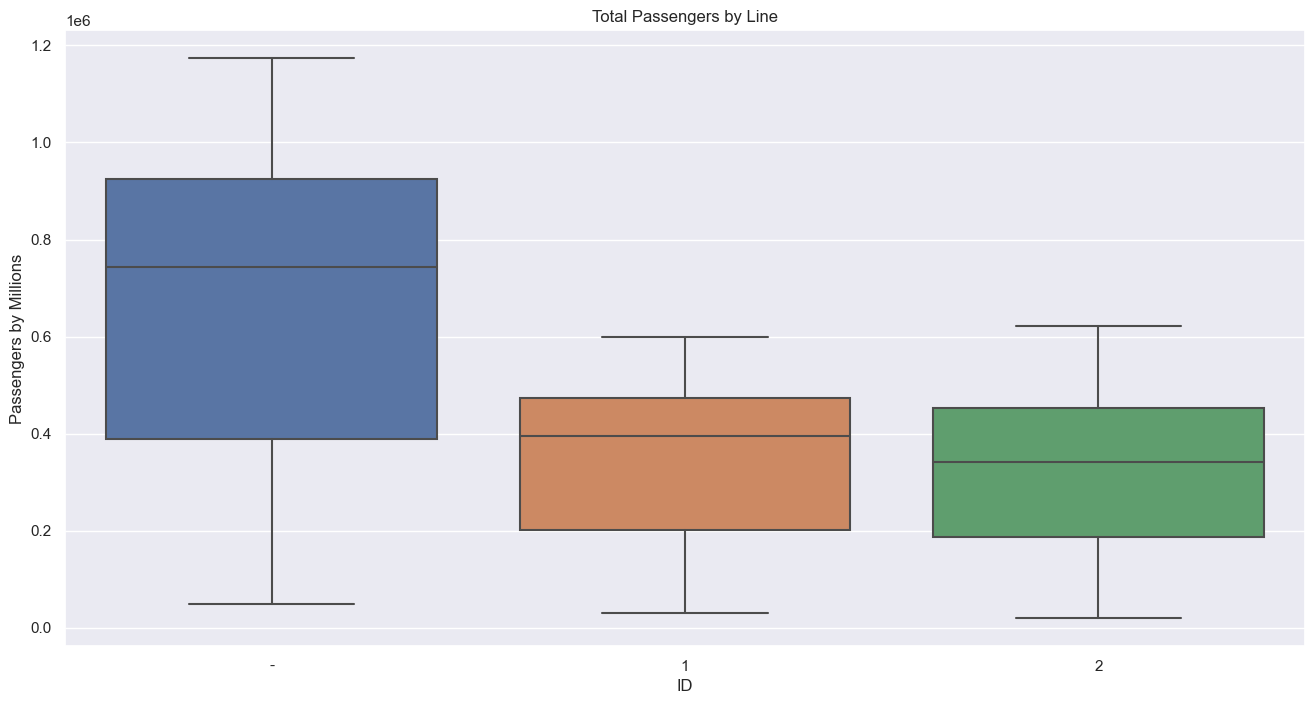

In [17]:
# The seaborn boxplot is a very basic plot. Boxplots are used to visualize distributions.
sns.set(rc={'figure.figsize':(16,8)}) # Adjust the figure size so the labels are clear and do not overlap
sns.boxplot( x=df["ID"], y=df["VALUE"] );
plt.xlabel("ID")
plt.ylabel("Passengers by Millions")
plt.title("Total Passengers by Line")
plt.show()

Text(0.5, 1.0, 'Detecting Outliers From VALUE Column')

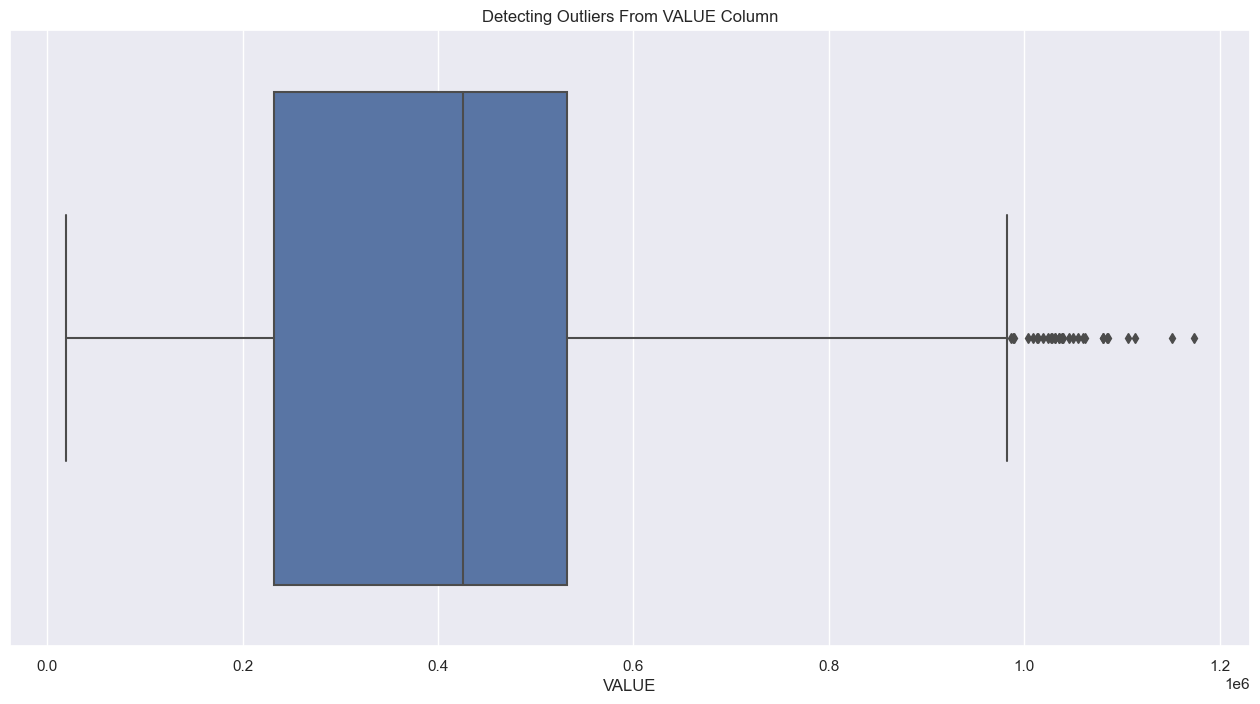

In [18]:
# Detecting Outliers
sns.boxplot(x=df['VALUE'])
plt.title("Detecting Outliers From VALUE Column")

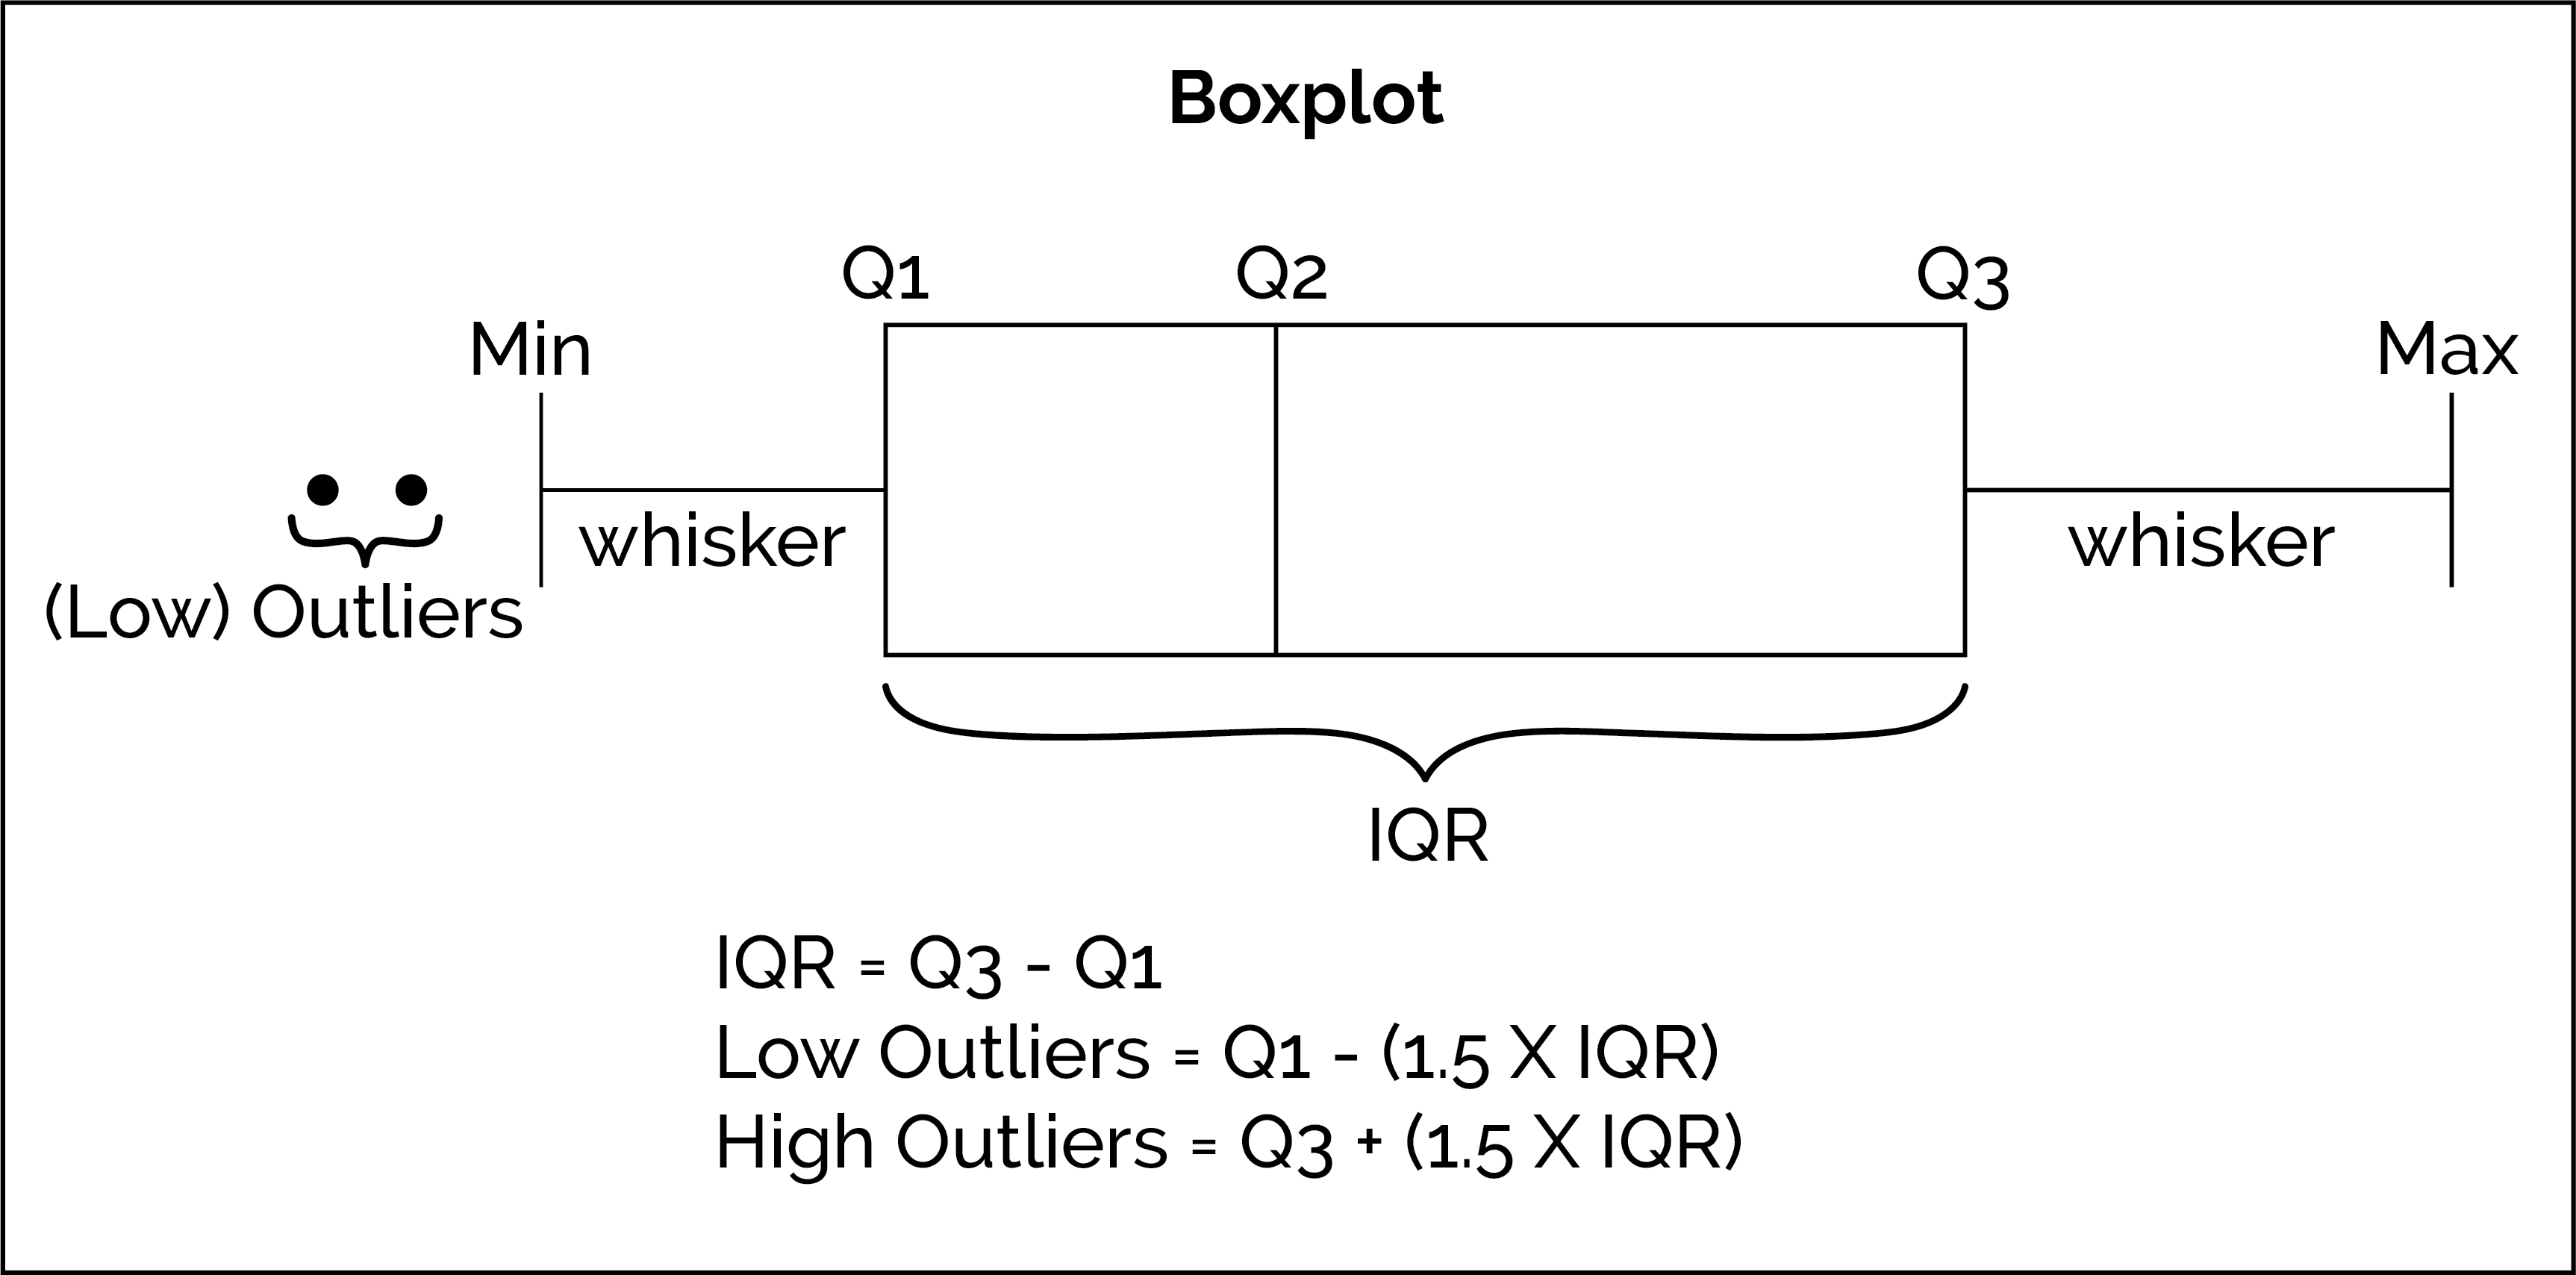

In [19]:
from IPython.display import Image
Image(filename =r'Boxplot-WebG.png', width = 600, height = 300)

In [20]:
# drop text values to remove error warning 
# save the numeric values to a new variable as text values will be needed to identify what rows to pull values from for charts
df_just_values = df.drop(["TLIST", "Luas Line"], axis=1)
df_just_values.head()

,Week,ID,VALUE
0,2019 Week 01,-,549533.0
1,2019 Week 01,1,274139.0
2,2019 Week 01,2,275394.0
3,2019 Week 02,-,839022.0
4,2019 Week 02,1,408199.0


In [21]:
# https://www.geeksforgeeks.org/split-a-text-column-into-two-columns-in-pandas-dataframe/

print("Given Dataframe is :\n",df_just_values) 
   
# Adding two new columns to the existing dataframe. 
# bydefault splitting is done on the basis of single space. 
df_just_values[['Year','Week2','WeekNo']] = df_just_values.Week.str.split(expand=True) 
   
print("\n After adding two new columns : \n", df_just_values)

Given Dataframe is :
              Week ID      VALUE
0    2019 Week 01  -   549533.0
1    2019 Week 01  1   274139.0
2    2019 Week 01  2   275394.0
3    2019 Week 02  -   839022.0
4    2019 Week 02  1   408199.0
..            ... ..        ...
775  2023 Week 47  1   465137.0
776  2023 Week 47  2   452163.0
777  2023 Week 48  -  1084541.0
778  2023 Week 48  1   556742.0
779  2023 Week 48  2   527799.0

[771 rows x 3 columns]

 After adding two new columns : 
              Week ID      VALUE  Year Week2 WeekNo
0    2019 Week 01  -   549533.0  2019  Week     01
1    2019 Week 01  1   274139.0  2019  Week     01
2    2019 Week 01  2   275394.0  2019  Week     01
3    2019 Week 02  -   839022.0  2019  Week     02
4    2019 Week 02  1   408199.0  2019  Week     02
..            ... ..        ...   ...   ...    ...
775  2023 Week 47  1   465137.0  2023  Week     47
776  2023 Week 47  2   452163.0  2023  Week     47
777  2023 Week 48  -  1084541.0  2023  Week     48
778  2023 Week 48  1   55

In [22]:
df_just_values.head()

,Week,ID,VALUE,Year,Week2,WeekNo
0,2019 Week 01,-,549533.0,2019,Week,01
1,2019 Week 01,1,274139.0,2019,Week,01
2,2019 Week 01,2,275394.0,2019,Week,01
3,2019 Week 02,-,839022.0,2019,Week,02
4,2019 Week 02,1,408199.0,2019,Week,02


In [23]:
# drop text values to remove error warning 
df_just_values = df_just_values.drop(["Week", "Week2"], axis=1)
df_just_values.head()

,ID,VALUE,Year,WeekNo
0,-,549533.0,2019,01
1,1,274139.0,2019,01
2,2,275394.0,2019,01
3,-,839022.0,2019,02
4,1,408199.0,2019,02


In [24]:
# https://www.geeksforgeeks.org/python-pandas-dataframe-replace/
# replace dash for zero
# zero all lines
# one red line
# two green line
df_just_values = df_just_values.replace('-', 0)
df_just_values.head()

,ID,VALUE,Year,WeekNo
0,0,549533.0,2019,01
1,1,274139.0,2019,01
2,2,275394.0,2019,01
3,0,839022.0,2019,02
4,1,408199.0,2019,02


In [25]:
# https://www.geeksforgeeks.org/change-the-order-of-a-pandas-dataframe-columns-in-python/
# Change the Order DataFrame Columns
df_just_values = df_just_values.iloc[:,[2,3,0,1]]
df_just_values.head()

,Year,WeekNo,ID,VALUE
0,2019,01,0,549533.0
1,2019,01,1,274139.0
2,2019,01,2,275394.0
3,2019,02,0,839022.0
4,2019,02,1,408199.0


In [26]:
# https://www.geeksforgeeks.org/change-data-type-for-one-or-more-columns-in-pandas-dataframe/
# Change Data Type of columns
# using dictionary to convert specific columns
convert_dict = {'Year': int,
                'WeekNo': int,
                'ID': int,
                'VALUE': int,
                }
 
df_just_values = df_just_values.astype(convert_dict)
print(df_just_values.dtypes)

Year      int32
WeekNo    int32
ID        int32
VALUE     int32
dtype: object


In [27]:
df_just_values.shape # (771, 4)

(771, 4)

In [28]:
# The IQR is the value of Q3 - Q1. The IQR tells us the range of the middle 50% of the data.
Q1 = df_just_values.quantile(0.25)
Q3 = df_just_values.quantile(0.75)
IQR = Q3-Q1
print(IQR)

Year           2.0
WeekNo        26.0
ID             2.0
VALUE     300446.5
dtype: float64


In [29]:
#df_just_values.tail()
df_just_values.shape # (324, 2)

(771, 4)

In [30]:
# The program will use these values to remove our outliers. It's just important to know how to use this technique.
#df_just_values = df_just_values[~((df_just_values < (Q1-1.5 * IQR)) |(df_just_values > (Q3 + 1.5 * IQR))).any(axis=1)]
df_just_values.shape # (740, 4)
#df_just_values.tail()

(771, 4)

In [31]:
df_just_values.tail()

,Year,WeekNo,ID,VALUE
775,2023,47,1,465137
776,2023,47,2,452163
777,2023,48,0,1084541
778,2023,48,1,556742
779,2023,48,2,527799


Text(0.5, 1.0, 'Total Passengers For Each Line by Year')

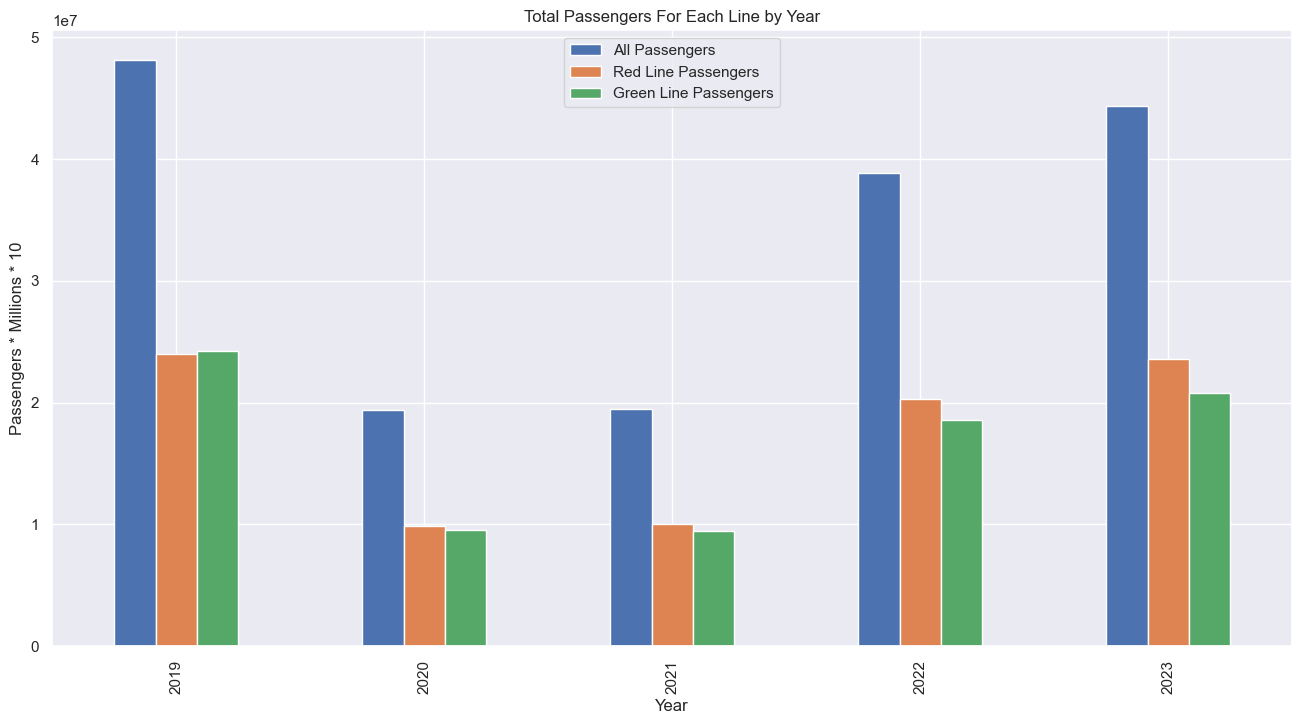

In [32]:
# https://www.statology.org/pandas-sum-column-with-condition/
# https://www.w3schools.com/python/numpy/numpy_creating_arrays.asp
all_passengers_2019 = df_just_values.loc[(df_just_values['Year'] == 2019) & (df_just_values['ID'] == 0), 'VALUE'].sum()
all_passengers_2020 = df_just_values.loc[(df_just_values['Year'] == 2020) & (df_just_values['ID'] == 0), 'VALUE'].sum()
all_passengers_2021 = df_just_values.loc[(df_just_values['Year'] == 2021) & (df_just_values['ID'] == 0), 'VALUE'].sum()
all_passengers_2022 = df_just_values.loc[(df_just_values['Year'] == 2022) & (df_just_values['ID'] == 0), 'VALUE'].sum()
all_passengers_2023 = df_just_values.loc[(df_just_values['Year'] == 2023) & (df_just_values['ID'] == 0), 'VALUE'].sum()
all_arr = np.array([all_passengers_2019, all_passengers_2020, all_passengers_2021, all_passengers_2022, all_passengers_2023])

red_passengers_2019 = df_just_values.loc[(df_just_values['Year'] == 2019) & (df_just_values['ID'] == 1), 'VALUE'].sum()
red_passengers_2020 = df_just_values.loc[(df_just_values['Year'] == 2020) & (df_just_values['ID'] == 1), 'VALUE'].sum()
red_passengers_2021 = df_just_values.loc[(df_just_values['Year'] == 2021) & (df_just_values['ID'] == 1), 'VALUE'].sum()
red_passengers_2022 = df_just_values.loc[(df_just_values['Year'] == 2022) & (df_just_values['ID'] == 1), 'VALUE'].sum()
red_passengers_2023 = df_just_values.loc[(df_just_values['Year'] == 2023) & (df_just_values['ID'] == 1), 'VALUE'].sum()
red_arr = np.array([red_passengers_2019, red_passengers_2020, red_passengers_2021, red_passengers_2022, red_passengers_2023])

green_passengers_2019 = df_just_values.loc[(df_just_values['Year'] == 2019) & (df_just_values['ID'] == 2), 'VALUE'].sum()
green_passengers_2020 = df_just_values.loc[(df_just_values['Year'] == 2020) & (df_just_values['ID'] == 2), 'VALUE'].sum()
green_passengers_2021 = df_just_values.loc[(df_just_values['Year'] == 2021) & (df_just_values['ID'] == 2), 'VALUE'].sum()
green_passengers_2022 = df_just_values.loc[(df_just_values['Year'] == 2022) & (df_just_values['ID'] == 2), 'VALUE'].sum()
green_passengers_2023 = df_just_values.loc[(df_just_values['Year'] == 2023) & (df_just_values['ID'] == 2), 'VALUE'].sum()
green_arr = np.array([green_passengers_2019, green_passengers_2020, green_passengers_2021, green_passengers_2022, green_passengers_2023])

# Create a sample dataframe with an text index
plotdata = pd.DataFrame({
    "All Passengers":all_arr,
    "Red Line Passengers":red_arr,
    "Green Line Passengers":green_arr
    }, 
    index = df_just_values.Year.unique()
)
plotdata.plot(kind="bar")
plt.xlabel("Year")
plt.ylabel("Passengers * Millions * 10")
plt.title("Total Passengers For Each Line by Year")

In [33]:
# https://www.w3schools.com/python/numpy/numpy_array_join.asp
# Join arrays
arr = np.array([all_arr, red_arr, green_arr])
arr

# https://www.geeksforgeeks.org/create-a-dataframe-from-a-numpy-array-and-specify-the-index-column-and-column-headers/
  
# creating a list of index names 
index_values = ['All', 'Red', 'Green'] 
   
# creating a list of column names 
column_values = ['2019', '2020', '2021', 
                '2022', '2023'] 
  
# creating the dataframe 
df = pd.DataFrame(data = arr,  
                  index = index_values,  
                  columns = column_values) 
  
# displaying the dataframe 
print(df)

           2019      2020      2021      2022      2023
All    48148506  19397972  19511557  38854633  44344608
Red    23945608   9840431  10057708  20319692  23544813
Green  24202898   9557549   9453850  18534942  20799794


Text(0.5, 1.0, 'Total Passengers For Each Line by Year')

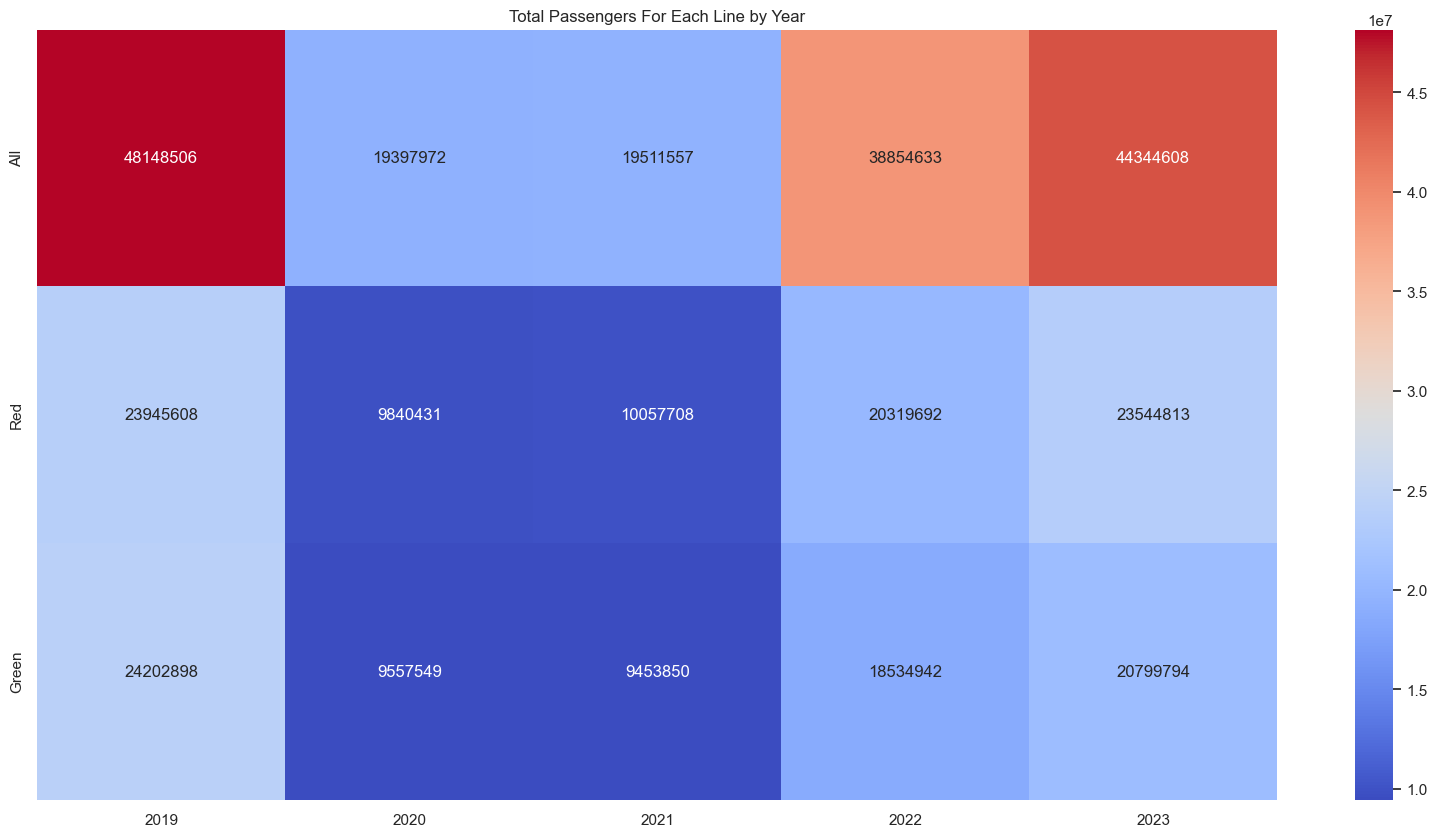

In [34]:
#plt.figure(figsize=(20,10))
#c= df.corr()
#sns.heatmap(c,cmap="BrBG",annot=True)
#c

#df_all_data = df_all_data.drop(["Year"], axis=1)
#value = round(num)
#plt.figure(figsize=(10,5))
#data_matrix = df.pivot_table(index="Year", columns="ID", values="VALUE")
#data_matrix
#sns.heatmap(data_matrix, cmap="coolwarm", annot=True, fmt=".1f")


# Finding the relations between the variables.
plt.figure(figsize=(20,10))
sns.heatmap(df,cmap="coolwarm", annot=True, fmt="1")
#c
#add title
plt.title('Total Passengers For Each Line by Year')

In [70]:
# https://www.tutorialspoint.com/how-to-read-json-file-in-python
# read in json file

import json

# returns JSON object as 
# a dictionary
with open(r"C:\Users\stphn\Documents\CCT\Assessment\CA2\TII03.20240108183001.json") as f:
   json_data = json.load(f)

# use four indents to make it easier to read the result:
print(json_data)


{'dataset': {'dimension': {'STATISTIC': {'label': 'Statistic', 'category': {'index': {'TII03C01': 0}, 'label': {'TII03C01': 'Passenger Journeys'}, 'unit': {'TII03C01': {'base': 'Number'}}}}, 'TLIST(W1)': {'label': 'Week', 'category': {'index': {'2019W01': 0, '2019W02': 1, '2019W03': 2, '2019W04': 3, '2019W05': 4, '2019W06': 5, '2019W07': 6, '2019W08': 7, '2019W09': 8, '2019W10': 9, '2019W11': 10, '2019W12': 11, '2019W13': 12, '2019W14': 13, '2019W15': 14, '2019W16': 15, '2019W17': 16, '2019W18': 17, '2019W19': 18, '2019W20': 19, '2019W21': 20, '2019W22': 21, '2019W23': 22, '2019W24': 23, '2019W25': 24, '2019W26': 25, '2019W27': 26, '2019W28': 27, '2019W29': 28, '2019W30': 29, '2019W31': 30, '2019W32': 31, '2019W33': 32, '2019W34': 33, '2019W35': 34, '2019W36': 35, '2019W37': 36, '2019W38': 37, '2019W39': 38, '2019W40': 39, '2019W41': 40, '2019W42': 41, '2019W43': 42, '2019W44': 43, '2019W45': 44, '2019W46': 45, '2019W47': 46, '2019W48': 47, '2019W49': 48, '2019W50': 49, '2019W51': 50, 

In [94]:
# the result is a Python dictionary:
#print(json_data["dataset"]['dimension']['STATISTIC'])
#print(json_data["dataset"]['dimension']['TLIST(W1)'])
#print(json_data["dataset"]['dimension']['C03132V03784'])
#print(json_data["dataset"]['dimension']['role'])
#print(json_data["dataset"]['dimension']['id'])
#print(json_data["dataset"]['dimension']['size'])
print(json_data["dataset"]['value'])
json_total_passengers = json_data["dataset"]['value']

[549533.0, 274139.0, 275394.0, 839022.0, 408199.0, 430823.0, 819359.0, 376785.0, 442574.0, 860745.0, 405224.0, 455521.0, 912795.0, 441197.0, 471598.0, 912612.0, 449398.0, 463215.0, 940476.0, 466795.0, 473682.0, 952291.0, 480974.0, 471317.0, 929391.0, 468299.0, 461093.0, 941919.0, 475467.0, 466451.0, 924998.0, 442796.0, 482201.0, 868205.0, 440137.0, 428068.0, 1003871.0, 516298.0, 487573.0, 933575.0, 457616.0, 475959.0, 945662.0, 469346.0, 476316.0, 842186.0, 426377.0, 415809.0, 801296.0, 408238.0, 393058.0, 919255.0, 453764.0, 465491.0, 817933.0, 411312.0, 406621.0, 904983.0, 446595.0, 458388.0, 902415.0, 455929.0, 446486.0, 973025.0, 502622.0, 470403.0, 826269.0, 422419.0, 403850.0, 925516.0, 471816.0, 453700.0, 883208.0, 444675.0, 438533.0, 905636.0, 457342.0, 448295.0, 982288.0, 498818.0, 483470.0, 919158.0, 478360.0, 440798.0, 903958.0, 452205.0, 451753.0, 926491.0, 469191.0, 457300.0, 832452.0, 422939.0, 409513.0, 807393.0, 423004.0, 384389.0, 868677.0, 445915.0, 422762.0, 862939.0

In [97]:
json_total_passengers

[549533.0,
 274139.0,
 275394.0,
 839022.0,
 408199.0,
 430823.0,
 819359.0,
 376785.0,
 442574.0,
 860745.0,
 405224.0,
 455521.0,
 912795.0,
 441197.0,
 471598.0,
 912612.0,
 449398.0,
 463215.0,
 940476.0,
 466795.0,
 473682.0,
 952291.0,
 480974.0,
 471317.0,
 929391.0,
 468299.0,
 461093.0,
 941919.0,
 475467.0,
 466451.0,
 924998.0,
 442796.0,
 482201.0,
 868205.0,
 440137.0,
 428068.0,
 1003871.0,
 516298.0,
 487573.0,
 933575.0,
 457616.0,
 475959.0,
 945662.0,
 469346.0,
 476316.0,
 842186.0,
 426377.0,
 415809.0,
 801296.0,
 408238.0,
 393058.0,
 919255.0,
 453764.0,
 465491.0,
 817933.0,
 411312.0,
 406621.0,
 904983.0,
 446595.0,
 458388.0,
 902415.0,
 455929.0,
 446486.0,
 973025.0,
 502622.0,
 470403.0,
 826269.0,
 422419.0,
 403850.0,
 925516.0,
 471816.0,
 453700.0,
 883208.0,
 444675.0,
 438533.0,
 905636.0,
 457342.0,
 448295.0,
 982288.0,
 498818.0,
 483470.0,
 919158.0,
 478360.0,
 440798.0,
 903958.0,
 452205.0,
 451753.0,
 926491.0,
 469191.0,
 457300.0,
 832452.0

In [103]:
#df = pd.read_json(r"C:\Users\stphn\Documents\CCT\Assessment\CA2\TII03.20240108183001.json")
#df

,dataset
dimension,"{'STATISTIC': {'label': 'Statistic', 'category..."
label,Passenger Journeys by Luas
source,Transport Infrastructure Ireland
updated,2023-12-19T11:00:00Z
value,"[549533.0, 274139.0, 275394.0, 839022.0, 40819..."


In [105]:
# Example 2: Convert JSON to DataFrame Using read_json()
#df2 = pd.read_json(r"C:\Users\stphn\Documents\CCT\Assessment\CA2\TII03.20240108183001.json", orient ='index')
#df2

,dimension,label,source,updated,value
dataset,"{'STATISTIC': {'label': 'Statistic', 'category...",Passenger Journeys by Luas,Transport Infrastructure Ireland,2023-12-19T11:00:00Z,"[549533.0, 274139.0, 275394.0, 839022.0, 40819..."


In [107]:
#df2.tail()

,dimension,label,source,updated,value
dataset,"{'STATISTIC': {'label': 'Statistic', 'category...",Passenger Journeys by Luas,Transport Infrastructure Ireland,2023-12-19T11:00:00Z,"[549533.0, 274139.0, 275394.0, 839022.0, 40819..."


In [108]:
#df2['value']
#output
#dataset    [549533.0, 274139.0, 275394.0, 839022.0, 40819...
#Name: value, dtype: object

dataset    [549533.0, 274139.0, 275394.0, 839022.0, 40819...
Name: value, dtype: object

In [112]:
# https://www.tutorialspoint.com/python-program-to-remove-null-value-from-a-list
json_totals_nulls_removed = list(filter(None,json_total_passengers))
print(json_totals_nulls_removed)

[549533.0, 274139.0, 275394.0, 839022.0, 408199.0, 430823.0, 819359.0, 376785.0, 442574.0, 860745.0, 405224.0, 455521.0, 912795.0, 441197.0, 471598.0, 912612.0, 449398.0, 463215.0, 940476.0, 466795.0, 473682.0, 952291.0, 480974.0, 471317.0, 929391.0, 468299.0, 461093.0, 941919.0, 475467.0, 466451.0, 924998.0, 442796.0, 482201.0, 868205.0, 440137.0, 428068.0, 1003871.0, 516298.0, 487573.0, 933575.0, 457616.0, 475959.0, 945662.0, 469346.0, 476316.0, 842186.0, 426377.0, 415809.0, 801296.0, 408238.0, 393058.0, 919255.0, 453764.0, 465491.0, 817933.0, 411312.0, 406621.0, 904983.0, 446595.0, 458388.0, 902415.0, 455929.0, 446486.0, 973025.0, 502622.0, 470403.0, 826269.0, 422419.0, 403850.0, 925516.0, 471816.0, 453700.0, 883208.0, 444675.0, 438533.0, 905636.0, 457342.0, 448295.0, 982288.0, 498818.0, 483470.0, 919158.0, 478360.0, 440798.0, 903958.0, 452205.0, 451753.0, 926491.0, 469191.0, 457300.0, 832452.0, 422939.0, 409513.0, 807393.0, 423004.0, 384389.0, 868677.0, 445915.0, 422762.0, 862939.0

In [ ]:
json_totals_nulls_removed